# Investigation of different parameterizations of w(x)
In this notebook I investigate the inpact different parametrizations has on w(x) presented by Peters et al. (2020)

\begin{align}
w(x) &= \frac{\hat{p}(x) + \varepsilon[\hat{p}(x)]}{\int_{-\infty}^\infty \hat{p}(s) + \varepsilon[\hat{p}(s)] ds}  \\ \\
     &  = \frac{\frac{n(x)}{T} + \sqrt{\frac{n(x)}{T^2}}}{\int_{-\infty}^\infty \frac{n(s)}{T} + \sqrt{\frac{n(s)}{T^2}} ds}
\end{align}

I investigate multiple different parameterizations, but would like to end up with one that (as CPT) has two parameters: 
- a sensitivity parameter; and 
- a elevation parameter

In [1]:
# %matplotlib notebook
# from ipywidgets import *
import math
import matplotlib.pyplot as plt
import numpy as np

In [68]:
def we(n,T,par="none", delta=1,gamma=1):
    if par=="1":
        n = n*delta
    elif par=="2":
        n=n*delta
        T=T*gamma
    #Estimating w for outcome 
    p =  n/T
    error = math.sqrt(p/T)
    
    if par=="3":
        p = p*delta
        error = error*gamma
    
    w = p+error
    
    #Estimating w for 1-outcome
    p2 = (T-n)/T
    error2 = math.sqrt(p2/T)
    
    if par=="3":
        p2 = p2*delta
        error2 = error2*gamma
    
    w2 = p2 + error2
    
    #Normalizing
    w_norm = w/(w+w2)
    w2_norm = w2/(w+w2)
#     print(w_norm)
#     print(w2_norm)

    return w_norm, p

In [ ]:

w = []
p = []
x = np.linspace(0,T,N)
for n in x:
    w_tmp, p_tmp = we(n,T)
    w.append(w_tmp)
    p.append(p_tmp)

In [ ]:
plt.figure()
plt.plot(p,w, label='w(x)')
plt.plot(p,p, label='p(x)')
plt.legend()
plt.show()

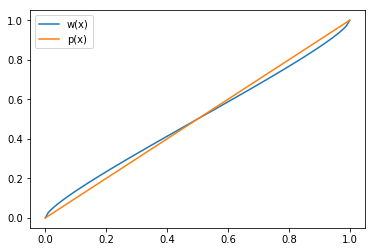

In [74]:
T = 1
N = 100
delta = 1
x = np.linspace(0,T,N)
weight = []
p = []
for n in x:
    w_tmp, p_tmp = we(n,T,par="3", delta=2, gamma=0.5)
    weight.append(w_tmp)
    p.append(p_tmp)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot(x, weight, label='w(x)')
line, = ax.plot(x, x, label='p(x)')
ax.legend()
plt.show()